In [163]:
#importing the required libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [164]:
#loading data
(X_train,y_train) , (X_test,y_test)=mnist.load_data()
#reshaping data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1)) 
#checking the shape after reshaping
print(X_train.shape)
print(X_test.shape)
#normalizing the pixel values
X_train=X_train/255
X_test=X_test/255

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [165]:
#defining model
model=Sequential()
#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
#adding pooling layer
model.add(MaxPool2D(2,2))
#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))
#adding output layer
model.add(Dense(10,activation='softmax'))
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#fitting the model
model.fit(X_train,y_train,epochs=25)

Epoch 1/25
1875/1875 [==============================] - 67s 35ms/step - loss: 0.1508 - accuracy: 0.9548
Epoch 2/25
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0525 - accuracy: 0.9840
Epoch 3/25
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0333 - accuracy: 0.9900
Epoch 4/25
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0227 - accuracy: 0.9928
Epoch 5/25
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0148 - accuracy: 0.9953
Epoch 6/25
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0113 - accuracy: 0.9964
Epoch 7/25
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0071 - accuracy: 0.9980
Epoch 8/25
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0065 - accuracy: 0.9979
Epoch 9/25
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0045 - accuracy: 0.9984
Epoch 10/25
1875/1875 [==============================] - 40s 21m

In [166]:
#evaluting the model
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0935 - accuracy: 0.9857


[0.09348201006650925, 0.9857000112533569]

In [167]:
model.predict(X_test)

313/313 [==============================] - 2s 7ms/step


array([[3.9037412e-21, 7.5407245e-20, 1.4784923e-20, ..., 9.9999994e-01,
        2.4538836e-20, 1.9603783e-15],
       [2.0848176e-20, 1.2113301e-15, 9.9999994e-01, ..., 8.4637767e-30,
        2.4061648e-27, 6.9284267e-26],
       [5.0437990e-16, 9.9999994e-01, 7.7377618e-14, ..., 8.1539165e-13,
        3.1094729e-14, 6.4368568e-17],
       ...,
       [2.1770446e-32, 4.2148987e-22, 1.2448353e-27, ..., 5.1890038e-22,
        7.4324553e-21, 8.9685388e-13],
       [9.7508193e-30, 1.4149784e-23, 9.4933442e-38, ..., 3.9352280e-29,
        6.0705665e-14, 2.7281322e-28],
       [6.5441496e-28, 1.5474701e-32, 3.5290726e-24, ..., 1.1484289e-27,
        9.7716062e-28, 6.5685029e-30]], dtype=float32)

In [168]:
model.save('mnist.h5')

In [169]:
import cv2

In [170]:
img=cv2.imread("/content/images.png")

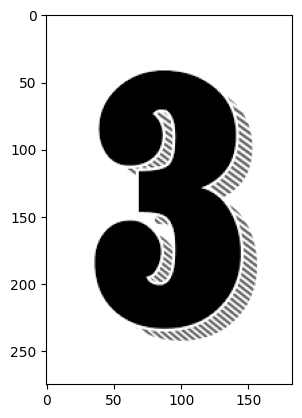

In [171]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [172]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [173]:
rsz=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [174]:
from tensorflow.keras.utils import normalize

In [175]:
newimg=normalize(rsz,axis=1)

In [176]:
import numpy as np


In [177]:
newimg=np.array(newimg).reshape(-1,28,28,1)

In [178]:
newimg.shape

(1, 28, 28, 1)

In [179]:
predictions=model.predict(newimg)

1/1 [==============================] - 0s 25ms/step


In [180]:
print(np.argmax(predictions))

3
